In [2]:
import numpy as np
import pygimli as pg
#import pybert as pb
from pygimli.physics import ert
#from pybert.importer.exportData import exportRes2dInv
from pygimli.physics.ert.importData import importRes2dInv
import matplotlib.pyplot as plt
import pygimli.meshtools as mt
from pygimli.frameworks import PriorModelling, JointModelling
from scipy.interpolate import interp1d
import pandas as pd
import pickle

In [3]:
dir='//smb.isipd.dmawi.de/projects/p_subaqua/Expeditions/2023/NWT2023/analysis_Tuk/Tuk_all_mehriban/'

In [4]:
#data = ert.load(dir+"res2dinv_inputs/amphibious_ERT_eastern_transect2_gps.Dat")
data = ert.load(dir+"res2dinv_inputs/ERT_eastern_perpendicular_gps.Dat")
data

11/06/24 - 10:38:02 - pyGIMLi - INFO - could not read unified data format for ERT ... try res2dinv


Data: Sensors: 48 data: 565, nonzero entries: ['a', 'b', 'm', 'n', 'rhoa', 'valid']

11/06/24 - 10:38:03 - pyGIMLi - INFO - Create default mesh for geometric factor calculation.


11/06/24 - 10:38:05 - pyGIMLi - INFO - Save RVector binary
11/06/24 - 10:38:05 - pyGIMLi - INFO - Cache stored: C:\Users\mealiy001\AppData\Roaming\pygimli\Cache\4845330605075561305
11/06/24 - 10:38:06 - pyGIMLi - INFO - Save RVector binary
11/06/24 - 10:38:06 - pyGIMLi - INFO - Cache stored: C:\Users\mealiy001\AppData\Roaming\pygimli\Cache\3783055265586703701


565 [31.17637906715631,...,31.309481391904864]

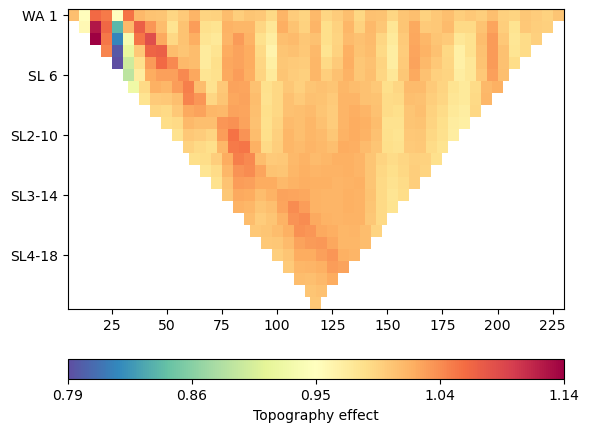

In [5]:
data.setSensorPositions(pg.meshtools.interpolateAlongCurve(data.additionalPoints(), pg.x(data)))
data['k'] = ert.createGeometricFactors(data, numerical=True)
mgr = ert.ERTManager(sr=False)
k0 = ert.createGeometricFactors(data)
ert.showData(data, vals=k0/data['k'], label='Topography effect')
data
data['k']

(<Axes: >, <matplotlib.colorbar.Colorbar at 0x2473c0a2150>)

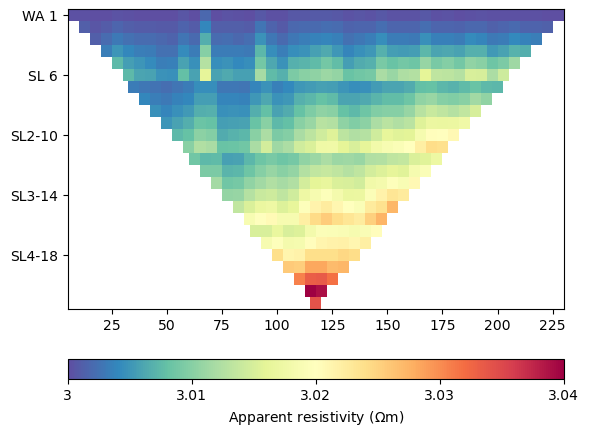

In [6]:
data['err'] = ert.estimateError(data, relativeError=0.03, absoluteUError=5e-5)
ert.show(data, data['err']*100)

(<Axes: >, <matplotlib.colorbar.Colorbar at 0x2473c5bd710>)

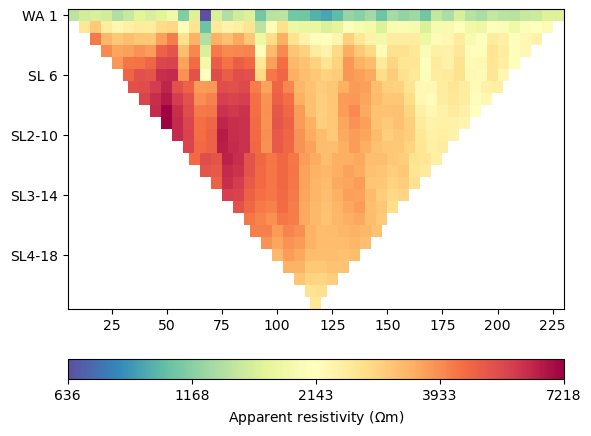

In [7]:
ert.showData(data)

11/06/24 - 10:38:18 - pyGIMLi - INFO - Found 2 regions.
11/06/24 - 10:38:18 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
11/06/24 - 10:38:18 - pyGIMLi - INFO - Found 2 regions.
11/06/24 - 10:38:18 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
11/06/24 - 10:38:18 - pyGIMLi - INFO - Creating forward mesh from region infos.
11/06/24 - 10:38:18 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.
11/06/24 - 10:38:18 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 2388 Cells: 4420 Boundaries: 3492
11/06/24 - 10:38:18 - pyGIMLi - INFO - Use median(data values)=3195.34009
11/06/24 - 10:38:18 - pyGIMLi - INFO - Created startmodel from forward operator: 871, min/max=3195.340090/3195.340090
11/06/24 - 10:38:18 - pyGIMLi - INFO - Starting inversion.


fop: <pygimli.physics.ert.ertModelling.ERTModelling object at 0x0000024734436E30>
Data transformation: <pgcore._pygimli_.RTransLogLU object at 0x0000024734481170>
Model transformation: <pgcore._pygimli_.RTransLog object at 0x0000024732B7CDB0>
min/max (data): 636/7218
min/max (error): 3%/3.04%
min/max (start model): 3195/3195
--------------------------------------------------------------------------------
inv.iter 0 ... chi² =  174.67
--------------------------------------------------------------------------------
inv.iter 1 ... chi² =   25.50 (dPhi = 84.88%) lam: 10.0
--------------------------------------------------------------------------------
inv.iter 2 ... chi² =    3.75 (dPhi = 77.98%) lam: 10.0
--------------------------------------------------------------------------------
inv.iter 3 ... chi² =    1.36 (dPhi = 39.72%) lam: 10.0
--------------------------------------------------------------------------------
inv.iter 4 ... chi² =    1.10 (dPhi = 6.29%) lam: 10.0
---------------

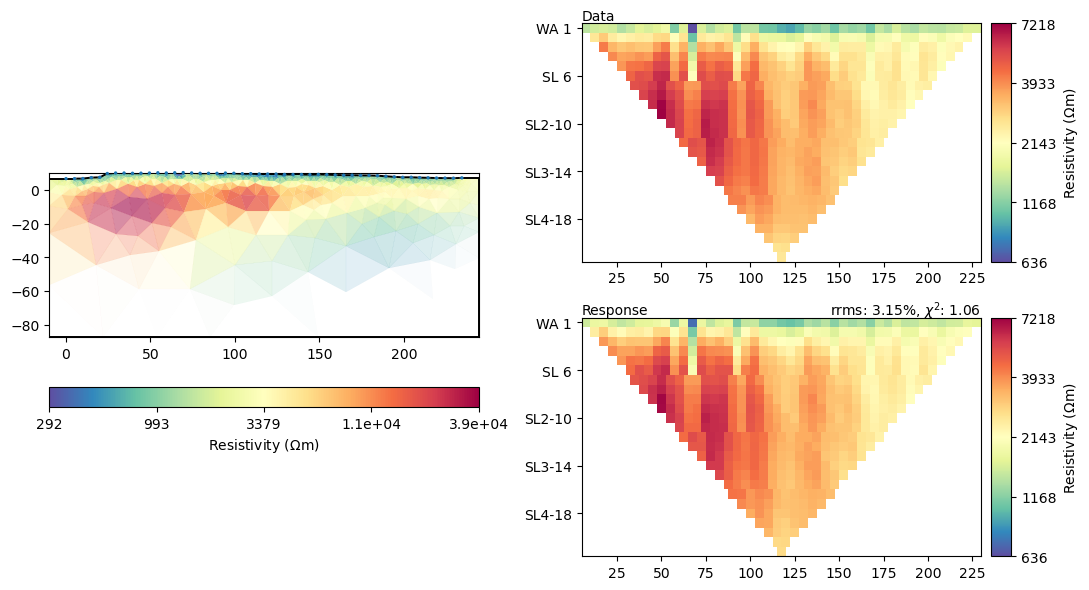

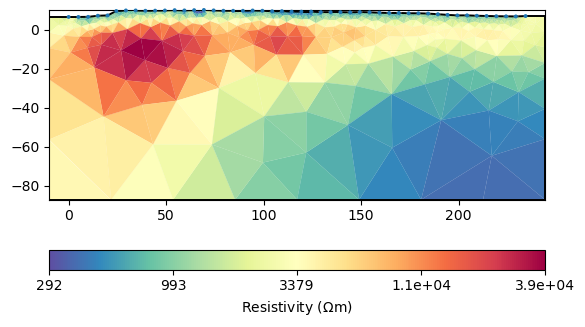

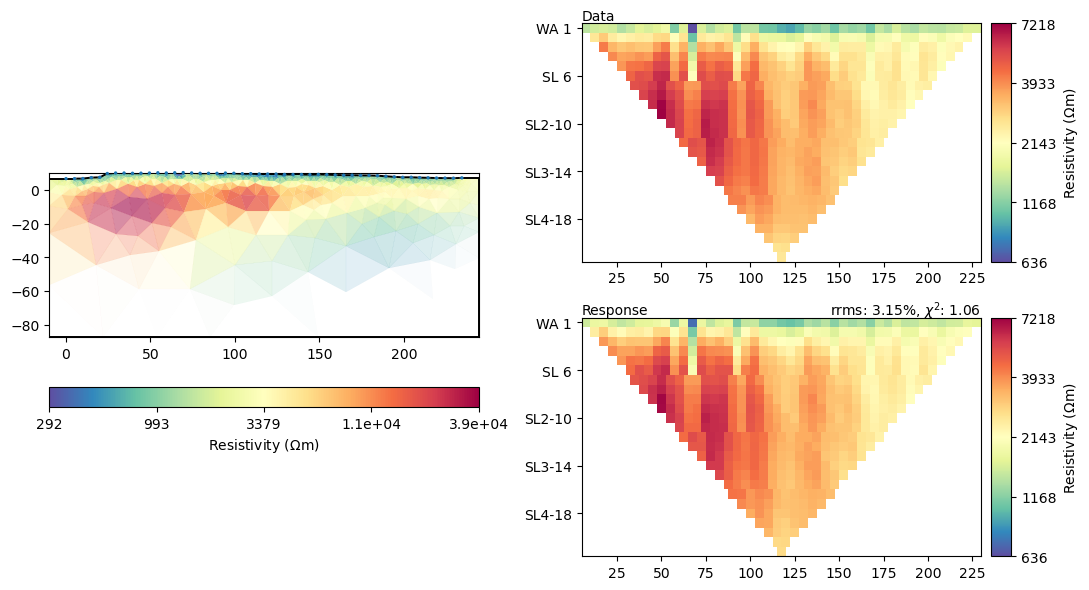

In [8]:
mgr.invert(data, verbose=True, paraDX = 0.25, paraDZ= 0.25, lam=10)

mgr.showResult(coverage=1)
mgr.showResultAndFit()

21/05/24 - 13:43:24 - pyGIMLi - INFO - Saving inversion results to: //smb.isipd.dmawi.de/projects/p_subaqua/Expeditions/2023/NWT2023/analysis_Tuk/Tuk_all_mehriban/pygimli/all_inversions\ERTManager


('//smb.isipd.dmawi.de/projects/p_subaqua/Expeditions/2023/NWT2023/analysis_Tuk/Tuk_all_mehriban/pygimli/all_inversions\\ERTManager',
 <Figure size 1600x1000 with 2 Axes>,
 <Axes: >)

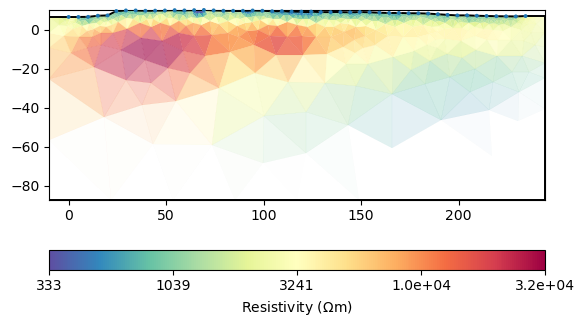

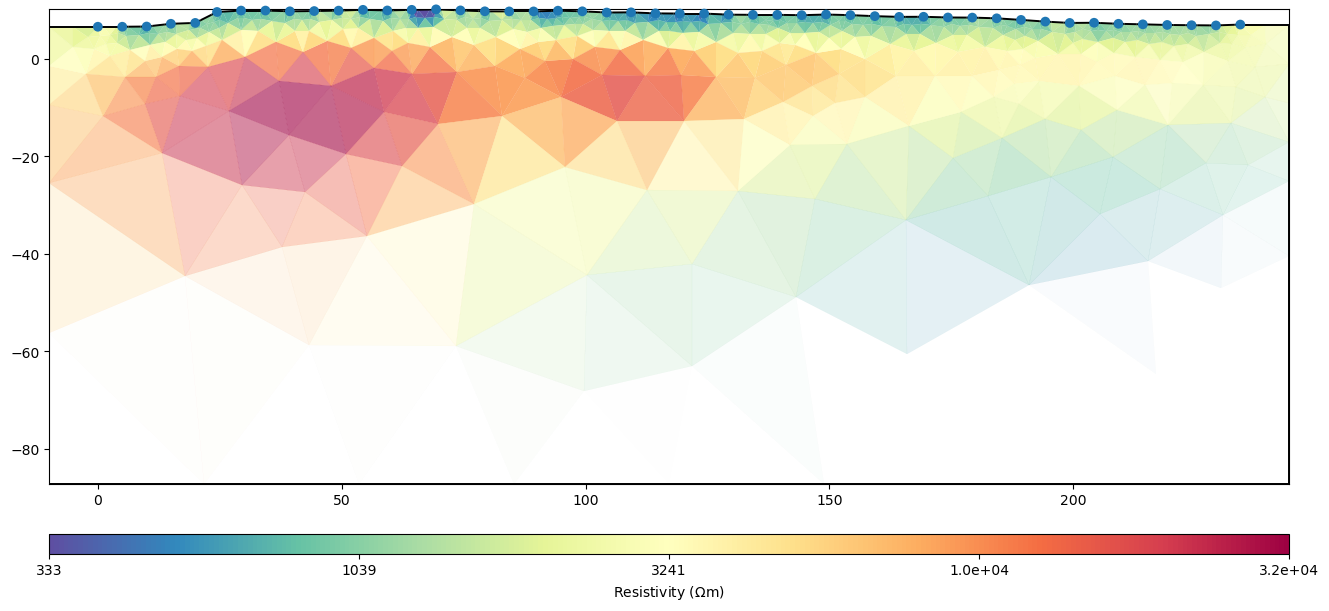

In [21]:
mgr.showResult(cMap="Spectral_r", logScale=True)
mgr.saveResult(dir+ 'pygimli/all_inversions')

(-40.0, 11.141096614746566)

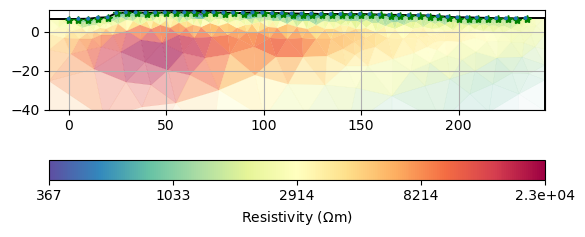

In [18]:
from pygimli.viewer.mpl import draw1DColumn

AL = np.loadtxt(dir + "pygimli/AL_eastern_parallel_to_shore.txt")

x_AL = AL[:, 0]
z_AL = AL[:, 1]

ax, cb = mgr.showResult()
#ax.plot(ibpt_x, ibpt_depth_smoothed, ":", linewidth=1, color='black')
ax.plot(x_AL, z_AL, 'g*', linewidth=0.5)
ax.grid(True)
ax.set_ylim(-40)